In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def f(x):
    return 0.5*x**2+3

In [10]:
X = np.linspace(-20, 20, 101)
Y = f(X) + np.random.randn(101)*100

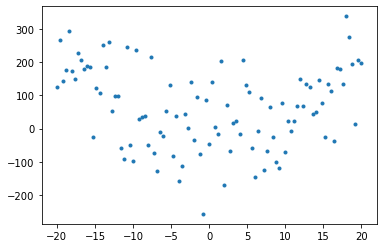

In [11]:
plt.plot(X, Y, ".")

In [12]:
mask = np.random.rand(101) > 0.5
mask

array([False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True,  True, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False, False, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False,  True,  True, False, False,  True,
       False,  True])

In [13]:
X_train = X[mask]
Y_train = Y[mask]

In [14]:
X_test = X[np.invert(mask)]
Y_test = Y[np.invert(mask)]

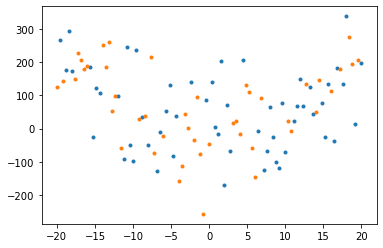

In [17]:
plt.plot(X_train, Y_train, ".")
plt.plot(X_test, Y_test, ".")

In [18]:
def regression(X, Y, n):
    A = [X**i for i in range(n, -1, -1)]
    A = np.vstack(A).T
    theta = np.linalg.solve(A.T@A,A.T@Y)
    return theta

In [21]:
theta = regression(X, Y, 2)
theta

array([  0.56937231,  -1.03740896, -13.42314154])

In [20]:
def predict(X, theta):
    n = len(theta)

    sum = np.zeros_like(X, dtype=float)
    for i in range(n):
        j = n - i -1
        sum += theta[i]*X**j

    return sum

In [23]:
Yhat = predict(X, theta)

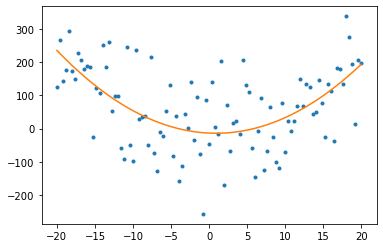

In [24]:
plt.plot(X, Y, ".")
plt.plot(X, Yhat)


In [25]:
def mse(Yhat, Y):
    E = Yhat - Y
    return (E**2).sum()/len(Y)

In [26]:
mse(Yhat, Y)

9428.849445498021

In [40]:
def fit(X, Y, n):
    theta = regression(X, Y, n)
    Yhat = predict(X, theta)
    return Yhat
    
def fit_and_plot(X, Y, n):
    Yhat = fit(X, Y, n)
    plt.plot(X, Yhat, label=str(n))

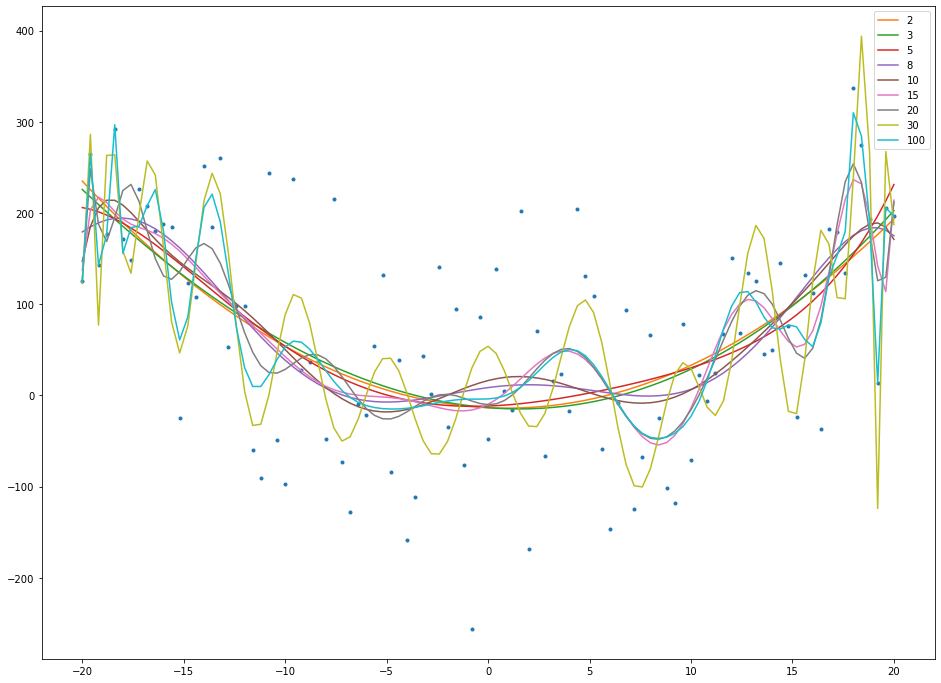

In [38]:
plt.figure(figsize=(16, 12))
plt.plot(X, Y, ".")
for n in [2, 3, 5, 8, 10, 15, 20,30,100]:
    fit_and_plot(X, Y, n)
plt.legend()

In [43]:
def fit_and_mse(X, Y, n):
    Yhat = fit(X, Y, n)
    return mse(Y, Yhat)

In [45]:
fit_and_mse(X, Y, 2)

9428.849445498021

In [48]:
N = list(range(2, 101))
MSE = [fit_and_mse(X, Y, n) for n in N]

(0.0, 10000.0)

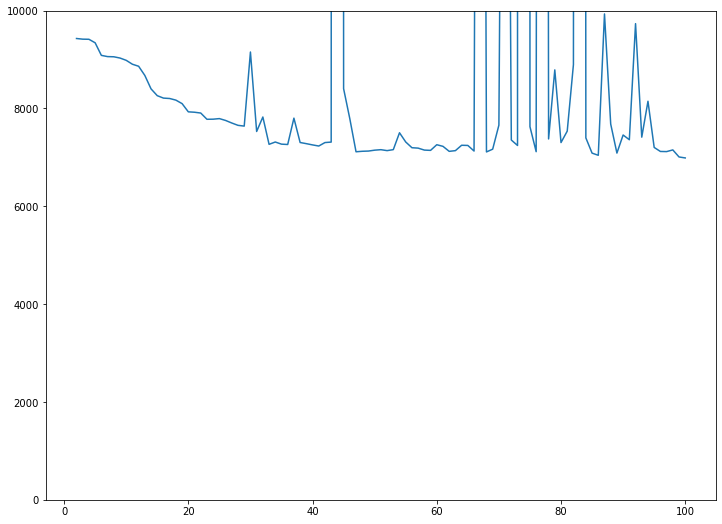

In [53]:
plt.figure(figsize=(12, 9))
plt.plot(N, MSE)
plt.ylim([0, 10000])

In [55]:
def train_on_train(n):
    theta = regression(X_train, Y_train, n)
    Yhat = predict(X_train, theta)
    return mse(Yhat, Y_train)

def train_on_test(n):
    theta = regression(X_train, Y_train, n)
    Yhat = predict(X_test, theta)
    return mse(Yhat, Y_test)

/tmp/ipykernel_18882/1211283983.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([0, 1000000])


(1068.5788193833548, 1000000)

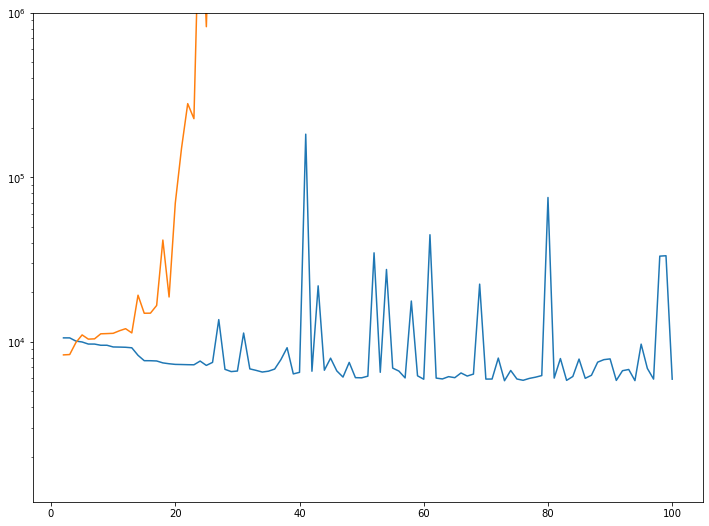

In [63]:
N = list(range(2, 101))
MSE1 = [train_on_train(n) for n in N]
MSE2 = [train_on_test(n) for n in N]

plt.figure(figsize=(12, 9))
plt.plot(N, MSE1)
plt.plot(N, MSE2)
plt.yscale("log")
plt.ylim([0, 1000000])

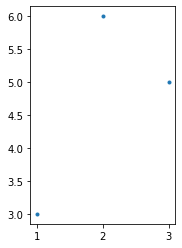

In [65]:
X = np.array([1, 2, 3])
Y = np.array([3, 6, 5])
plt.plot(X, Y, ".")
plt.gca().set_aspect('equal', adjustable='box')

In [114]:
theta1 = np.array([3.5, 1])

In [115]:
def Loss(theta):
    a, b = theta
    Yhat = a*X + b
    E = Yhat - Y
    return (E**2).sum()/len(X)

def Loss1(A, B):
    L = np.zeros_like(A)

    for x, y in zip(X, Y):
        Yhat = A*x + B
        E = Yhat - y
        L += E**2

    return L/len(X)


In [116]:
a = np.linspace(0, 4, 101)
b = np.linspace(0, 4, 101)
A, B = np.meshgrid(a, b)

In [117]:
L = Loss1(A, B)

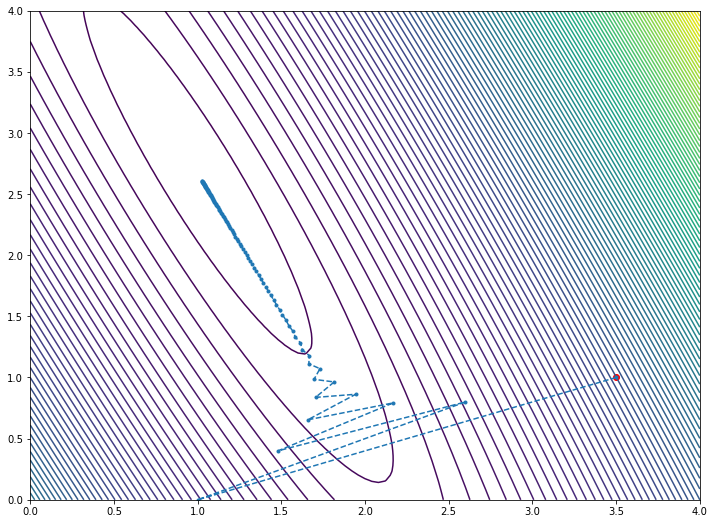

In [141]:
plt.figure(figsize=(12, 9))
plt.plot(theta1[0], theta1[1], "ro")
plt.contour(A, B, L, levels=100)
plt.plot(a_list, b_list, ".--");

In [120]:
def gradient(theta):
    a, b = theta
    A = np.vstack([X, X**0]).T
    Yhat = a*X+b
    return A.T@(Yhat-Y)/len(X)


In [121]:
theta1

array([3.5, 1. ])

In [130]:
gradient(theta1)

array([8.33333333, 3.33333333])

In [140]:
eta = 0.3
theta = theta1.copy()

a_list = []
b_list = []

for i in range(100):
    a, b = theta
    a_list.append(a)
    b_list.append(b)
    j = gradient(theta)
    theta -= j*eta

In [135]:
a_list

[1.0,
 2.5999999999999996,
 1.48,
 2.168,
 1.6576,
 1.9448000000000003,
 1.704304,
 1.8159632,
 1.69554352,
 1.7308795040000002,
 1.664411704,
 1.66708639376,
 1.6253494086880003,
 1.6145401146128,
 1.5845856559441602,
 1.5686813701354396,
 1.5447392308448948,
 1.5273778461401497,
 1.5068464615827775,
 1.4895757600045292]